<a href="https://colab.research.google.com/github/ominivac/analise_integraSUS/blob/master/Analise_de_dados_do_IntegraSUS_TESTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importações necessárias
import plotly
import pandas as pd
import numpy as np
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lendo o arquivo
df = pd.read_csv("/content/drive/My Drive/IntegraSUS/covid_teste.csv", low_memory=False, sep=';')

In [ ]:
# Ver os tipos das colunas
df.dtypes

codigoPaciente             object
estadoPaciente             object
codigoMunicipioPaciente     int64
municipioPaciente          object
sexoPaciente               object
idadePaciente               int64
obitoConfirmado              bool
resultadoFinalExame        object
dataResultadoExame         object
dataObito                  object
dtype: object

In [ ]:
  # Gerar nova coluna para cálculos em faixas de idade.
bins= [0,10,20,30,40,50,60,70,80,120]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81E+']
df['faixaIdade'] = pd.cut(df['idadePaciente'], bins=bins, labels=labels)

In [ ]:
df.head(3)

,codigoPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,obitoConfirmado,resultadoFinalExame,dataResultadoExame,dataObito,faixaIdade
0,b1ea443bbf37d9e49d60852b457916e3,CE,230440,FORTALEZA,MASCULINO,2,True,Positivo,2020-06-19,2020-06-15,0-10
1,b1ea443bbf37d9e49d60852b84579143,CE,230440,FORTALEZA,FEMININO,3,True,Positivo,2020-04-11,2020-06-12,0-10
2,b1ea443bbf37d9e49d6083252b457323,CE,230440,FORTALEZA,FEMININO,1,False,Negativo,2020-06-1,NaN,0-10


In [ ]:
  #Transformar as coluna de datas para datetime
df[["dataResultadoExame", "dataObito"]] =  df[["dataResultadoExame", "dataObito"]].apply(pd.to_datetime,  errors='coerce')
df.dtypes

codigoPaciente                     object
estadoPaciente                     object
codigoMunicipioPaciente             int64
municipioPaciente                  object
sexoPaciente                       object
idadePaciente                       int64
obitoConfirmado                      bool
resultadoFinalExame                object
dataResultadoExame         datetime64[ns]
dataObito                  datetime64[ns]
faixaIdade                       category
dtype: object

In [ ]:
# Nova coluna para somar o total de obitos 
df['qtObito'] = np.where(df['obitoConfirmado'] == True, 1, 0)
df.head()

,codigoPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,obitoConfirmado,resultadoFinalExame,dataResultadoExame,dataObito,faixaIdade,qtObito
0,b1ea443bbf37d9e49d60852b457916e3,CE,230440,FORTALEZA,MASCULINO,2,True,Positivo,2020-06-19,2020-06-15,0-10,1
1,b1ea443bbf37d9e49d60852b84579143,CE,230440,FORTALEZA,FEMININO,3,True,Positivo,2020-04-11,2020-06-12,0-10,1
2,b1ea443bbf37d9e49d6083252b457323,CE,230440,FORTALEZA,FEMININO,1,False,Negativo,2020-06-01,NaT,0-10,0
3,ckidd99dsdsjsjdsjddjsidisj92dsds,CE,230440,FORTALEZA,MASCULINO,55,False,Negativo,2020-07-03,NaT,51-60,0
4,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,56,True,Positivo,2020-02-05,2020-02-09,51-60,1


In [ ]:
# Nova coluna para somar de casos confirmados SEM óbito
df['qtCasoConfirmado'] = np.where(( df['resultadoFinalExame'] == 'Positivo') & (df['obitoConfirmado'] == False) , 1, 0)
df

,codigoPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,obitoConfirmado,resultadoFinalExame,dataResultadoExame,dataObito,faixaIdade,qtObito,qtCasoConfirmado
0,b1ea443bbf37d9e49d60852b457916e3,CE,230440,FORTALEZA,MASCULINO,2,True,Positivo,2020-06-19,2020-06-15,0-10,1,0
1,b1ea443bbf37d9e49d60852b84579143,CE,230440,FORTALEZA,FEMININO,3,True,Positivo,2020-04-11,2020-06-12,0-10,1,0
2,b1ea443bbf37d9e49d6083252b457323,CE,230440,FORTALEZA,FEMININO,1,False,Negativo,2020-06-01,NaT,0-10,0,0
3,ckidd99dsdsjsjdsjddjsidisj92dsds,CE,230440,FORTALEZA,MASCULINO,55,False,Negativo,2020-07-03,NaT,51-60,0,0
4,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,56,True,Positivo,2020-02-05,2020-02-09,51-60,1,0
5,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,57,False,Positivo,2020-06-19,2020-06-15,51-60,0,1
6,12233448fud8fu8f8du6052b457916e2,CE,230440,FORTALEZA,MASCULINO,24,True,Positivo,2020-05-24,2020-05-25,21-30,1,0
7,8kk3dt3kkkmkdskdskdm099b457916e2,CE,230440,FORTALEZA,MASCULINO,32,False,Negativo,2020-06-09,NaT,31-40,0,0
8,0o0dosdsbf37d9e49d60852b457916e2,CE,230440,FORTALEZA,FEMININO,15,True,Positivo,2020-05-27,2020-05-30,11-20,1,0
9,9ifd9if9di9fmfdlkdldksdb457916e2,CE,230440,FORTALEZA,MASCULINO,32,True,Positivo,2020-08-03,2020-08-02,31-40,1,0


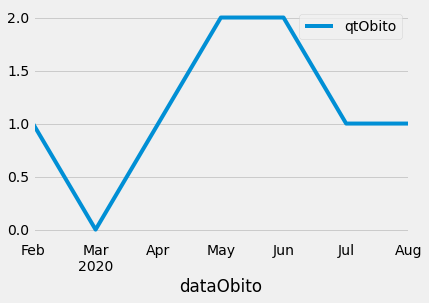

In [ ]:
  # agrupar por mes a qtde de obitos e plotar
df.groupby(pd.Grouper(key='dataObito',freq='M')).agg({'qtObito':'sum'}).plot()

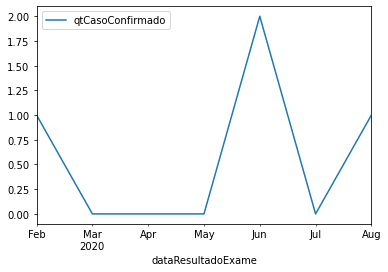

In [ ]:
  # agrupar por mes a qtde de casos confirmados SEM óbito e plotar
df.groupby(pd.Grouper(key='dataResultadoExame',freq='M')).agg({'qtCasoConfirmado':'sum'}).plot()

**Gerar novo dataset somente com casos confirmados**

In [ ]:
df_confirmados = df.loc[df['resultadoFinalExame'] == 'Positivo' ] 
df_confirmados

,codigoPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,obitoConfirmado,resultadoFinalExame,dataResultadoExame,dataObito,faixaIdade,qtObito,qtCasoConfirmado
0,b1ea443bbf37d9e49d60852b457916e3,CE,230440,FORTALEZA,MASCULINO,2,True,Positivo,2020-06-19,2020-06-15,0-10,1,0
1,b1ea443bbf37d9e49d60852b84579143,CE,230440,FORTALEZA,FEMININO,3,True,Positivo,2020-04-11,2020-06-12,0-10,1,0
4,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,56,True,Positivo,2020-02-05,2020-02-09,51-60,1,0
5,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,57,False,Positivo,2020-06-19,2020-06-15,51-60,0,1
6,12233448fud8fu8f8du6052b457916e2,CE,230440,FORTALEZA,MASCULINO,24,True,Positivo,2020-05-24,2020-05-25,21-30,1,0
8,0o0dosdsbf37d9e49d60852b457916e2,CE,230440,FORTALEZA,FEMININO,15,True,Positivo,2020-05-27,2020-05-30,11-20,1,0
9,9ifd9if9di9fmfdlkdldksdb457916e2,CE,230440,FORTALEZA,MASCULINO,32,True,Positivo,2020-08-03,2020-08-02,31-40,1,0
10,99djsdijndsmdsmdsmdsmd1332ddsds2,CE,230440,FORTALEZA,MASCULINO,95,True,Positivo,2020-04-01,2020-04-02,81E+,1,0
13,8dsud9suddçdsdsdd8uuwdsds1wdwdnc,CE,230440,FORTALEZA,MASCULINO,60,False,Positivo,2020-08-08,NaT,51-60,0,1
14,8dsudys7yd7syd7sydnsajjsahjas983,CE,230440,FORTALEZA,MASCULINO,79,False,Positivo,2020-06-01,2020-06-05,71-80,0,1


**Gerar novo dataset somente com óbitos confirmados**

In [ ]:
df_obito = df.loc[df['dataObito'].notnull()  ] 
df_obito

,codigoPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,sexoPaciente,idadePaciente,obitoConfirmado,resultadoFinalExame,dataResultadoExame,dataObito,faixaIdade,qtObito,qtCasoConfirmado
0,b1ea443bbf37d9e49d60852b457916e3,CE,230440,FORTALEZA,MASCULINO,2,True,Positivo,2020-06-19,2020-06-15,0-10,1,0
1,b1ea443bbf37d9e49d60852b84579143,CE,230440,FORTALEZA,FEMININO,3,True,Positivo,2020-04-11,2020-06-12,0-10,1,0
4,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,56,True,Positivo,2020-02-05,2020-02-09,51-60,1,0
5,b1ea443bbf37d9eIRIE52b45227916e2,CE,230440,FORTALEZA,FEMININO,57,False,Positivo,2020-06-19,2020-06-15,51-60,0,1
6,12233448fud8fu8f8du6052b457916e2,CE,230440,FORTALEZA,MASCULINO,24,True,Positivo,2020-05-24,2020-05-25,21-30,1,0
8,0o0dosdsbf37d9e49d60852b457916e2,CE,230440,FORTALEZA,FEMININO,15,True,Positivo,2020-05-27,2020-05-30,11-20,1,0
9,9ifd9if9di9fmfdlkdldksdb457916e2,CE,230440,FORTALEZA,MASCULINO,32,True,Positivo,2020-08-03,2020-08-02,31-40,1,0
10,99djsdijndsmdsmdsmdsmd1332ddsds2,CE,230440,FORTALEZA,MASCULINO,95,True,Positivo,2020-04-01,2020-04-02,81E+,1,0
14,8dsudys7yd7syd7sydnsajjsahjas983,CE,230440,FORTALEZA,MASCULINO,79,False,Positivo,2020-06-01,2020-06-05,71-80,0,1
16,9ewdjsnmcmm9299dmkdsjdk2e2eweddd,CE,230440,FORTALEZA,MASCULINO,80,True,Positivo,2020-07-12,2020-07-19,71-80,1,0


In [ ]:
# Verificando o total de óbitos e sua respectiva média - ok conferido

totalObitos = df_obito['qtObito'].sum()
mediaObitos = df_obito.qtObito.mean()

totalCasos = df_obito.qtObito.sum()


dict = {"Óbitos": totalObitos,
       "Media": [mediaObitos]}

totalMedia = pd.DataFrame(dict)

totalMedia["Media"] = totalMedia["Media"].map("{:2.2f}".format)

totalMedia

,Óbitos,Media
0,8,0.80


**Contando e confirmando os dados - por óbito**

In [ ]:
group_faixa_idade_obito = df_obito.groupby('faixaIdade')
group_faixa_idade_obito['faixaIdade'].count()

faixaIdade
0-10     2
11-20    1
21-30    1
31-40    1
41-50    0
51-60    2
61-70    0
71-80    2
81E+     1
Name: faixaIdade, dtype: int64

**Gerando uma série para o gráfico óbitos por faixa de idade**

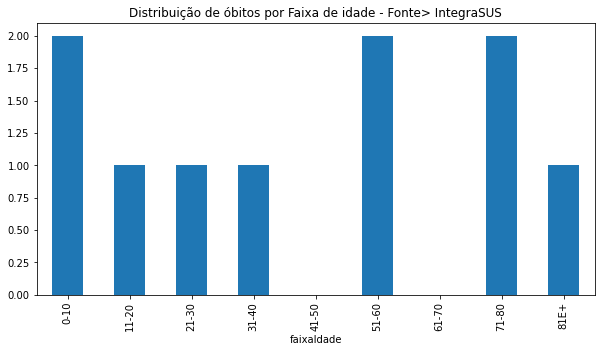

In [ ]:
gr_grafico = group_faixa_idade_obito['faixaIdade'].count()
gr_grafico.plot(kind="bar", figsize=(10,5), title = 'Distribuição de óbitos por Faixa de idade - Fonte> IntegraSUS')

**Contando e confirmando os dados - por casos confirmados**

In [ ]:
group_faixa_idade_confirmados = df_confirmados.groupby('faixaIdade')
group_faixa_idade_confirmados['faixaIdade'].count()

faixaIdade
0-10     2
11-20    1
21-30    2
31-40    1
41-50    0
51-60    3
61-70    0
71-80    2
81E+     1
Name: faixaIdade, dtype: int64

**Gerando uma série para o gráfico óbitos por casos confirmados - sem óbito**

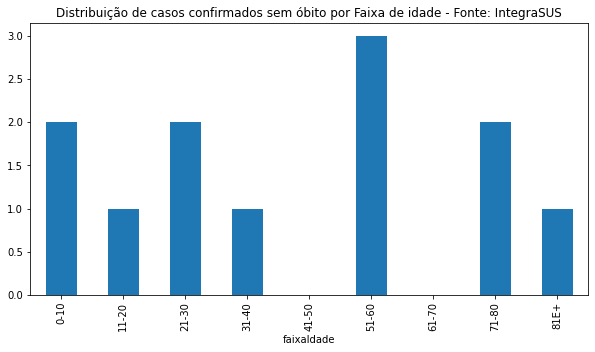

In [ ]:
gr_grafico_conf = group_faixa_idade_confirmados['faixaIdade'].count()
gr_grafico_conf.plot(kind="bar", figsize=(10,5), title = 'Distribuição de casos confirmados sem óbito por Faixa de idade - Fonte: IntegraSUS')


**borrao**

In [ ]:
cont_idade_sexo = df_obito.groupby(['faixaIdade','sexoPaciente']).faixaIdade.count().unstack()
print(cont_idade_sexo)

sexoPaciente  FEMININO  MASCULINO
faixaIdade                       
0-10                 1          1
11-20                1          0
21-30                0          1
31-40                0          1
41-50                0          0
51-60                2          0
61-70                0          0
71-80                0          2
81E+                 0          1


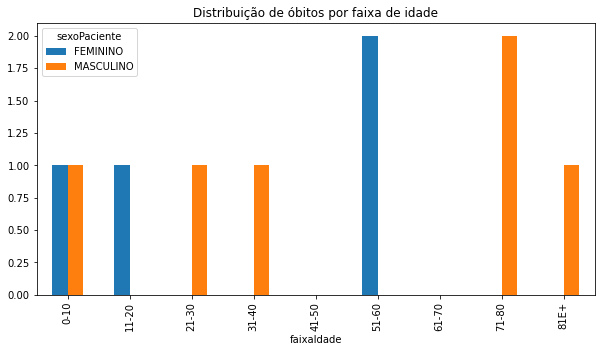

In [ ]:
cont_idade_sexo.plot(kind='bar', stacked=False, figsize=(10,5), title= "Distribuição de óbitos por faixa de idade",  )

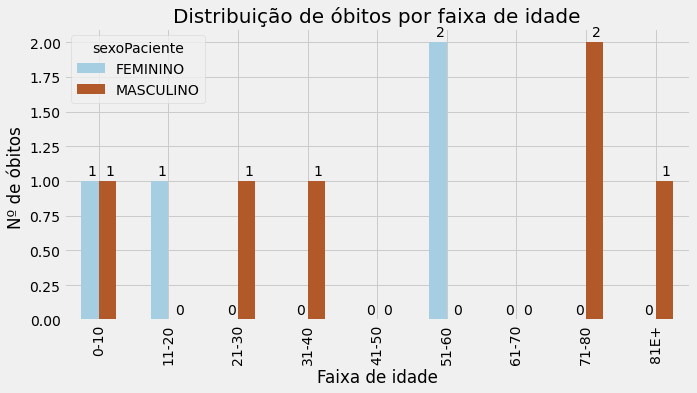

In [ ]:
 # Outra forma do mesmo gráfico
plt.style.use('fivethirtyeight')
ax = cont_idade_sexo.plot(kind='bar',stacked = False, colormap = 'Paired', figsize=(10,5))

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

plt.xlabel ('Faixa de idade')
plt.ylabel ('Nº de óbitos ')
plt.title('Distribuição de óbitos por faixa de idade',fontsize=20)
plt.show()

In [ ]:
# Analise somente para Fortaleza, criando um novo dataset
sexoObitos = df_obito.groupby(['sexoPaciente']).sum()['qtObito'].rename("Mortes por sexo")
sexoCasos = df_confirmados.groupby(['sexoPaciente']).sum()['qtCasoConfirmado'].rename("Casos por sexo")
obitosPorcentagem = (sexoObitos / totalObitos)*100
casosPorcentagem = (sexoCasos / totalCasos)* 100

dict2 = {"Óbitos por sexo": sexoObitos, 
         "Percentual de Óbitos": obitosPorcentagem, 
         "Casos por sexo": sexoCasos,
        "Percentual de Casos": casosPorcentagem}

dict2['Percentual de Óbitos'] = dict2["Percentual de Óbitos"].map("{:2.2f}%".format)
dict2['Percentual de Casos'] = dict2["Percentual de Casos"].map("{:2.2f}%".format)

dadosRegiao = pd.DataFrame(dict2)
dadosRegiao

,Óbitos por sexo,Percentual de Óbitos,Casos por sexo,Percentual de Casos
sexoPaciente,,,,
FEMININO,3,37.50%,2,25.00%
MASCULINO,5,62.50%,2,25.00%


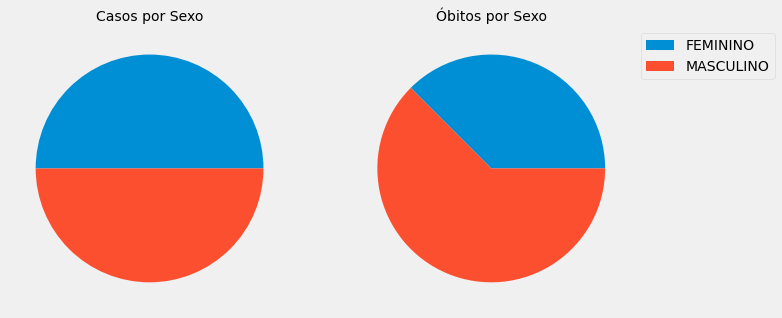

In [ ]:

# Visualizando gráficamente os dados comparativos entre óbitos e casos por região
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].pie(sexoCasos)
ax[0].set_title("Casos por Sexo", fontsize = 14)

ax[1].pie(sexoObitos)
ax[1].set_title("Óbitos por Sexo", fontsize = 14)
ax[1].legend(sexoCasos.index, bbox_to_anchor = [1, 1])
plt.show()